# Visual Object Recognition Using Transfer Learning
Dataset is Fruits-360 from Kaggle: https://www.kaggle.com/moltean/fruits 

## __Import Libraries__

In [1]:
import numpy as np
import cv2
import glob
import os
import random
import gc
from sklearn.datasets import load_files
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
test_dir = "C:/Users/benne/Documents/RoboGarden/Project/fruits-360/Test/"
train_dir = "C:/Users/benne/Documents/RoboGarden/Project/fruits-360/Training/"

# Import Datasets
Methodology from:  https://www.kaggle.com/waltermaffy/fruit-classification-pca-svm-knn-decision-tree

In [3]:
def getFruitNames():
    fruits = []
    for fruit_path in glob.glob("../*/fruits-360/Training/*"):
        fruit = fruit_path.split("\\")[-1]
        fruits.append(fruit)
    return fruits

In [4]:
fruits = getFruitNames()

In [5]:
fruits

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Nectarine Fla

In [6]:
def getFruits(fruits, folder):
    images = []
    labels = []
    path = "../*/fruits-360/" + folder + "/"
    
    for i,f in enumerate(fruits):
        p = path + f
        j=0
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            images.append(image)
            labels.append(i)
            j+=1
        print("There are " , j , " " , folder.upper(), " images of " , fruits[i].upper())
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [7]:
x_train, y_train =  getFruits(fruits, 'Training')

There are  492   TRAINING  images of  APPLE BRAEBURN
There are  444   TRAINING  images of  APPLE CRIMSON SNOW
There are  492   TRAINING  images of  APPLE GOLDEN 1
There are  492   TRAINING  images of  APPLE GOLDEN 2
There are  481   TRAINING  images of  APPLE GOLDEN 3
There are  492   TRAINING  images of  APPLE GRANNY SMITH
There are  456   TRAINING  images of  APPLE PINK LADY
There are  492   TRAINING  images of  APPLE RED 1
There are  492   TRAINING  images of  APPLE RED 2
There are  429   TRAINING  images of  APPLE RED 3
There are  490   TRAINING  images of  APPLE RED DELICIOUS
There are  492   TRAINING  images of  APPLE RED YELLOW 1
There are  672   TRAINING  images of  APPLE RED YELLOW 2
There are  492   TRAINING  images of  APRICOT
There are  427   TRAINING  images of  AVOCADO
There are  491   TRAINING  images of  AVOCADO RIPE
There are  490   TRAINING  images of  BANANA
There are  450   TRAINING  images of  BANANA LADY FINGER
There are  490   TRAINING  images of  BANANA RED
Ther

### Visualize categorical data

#### Visualize Train Data

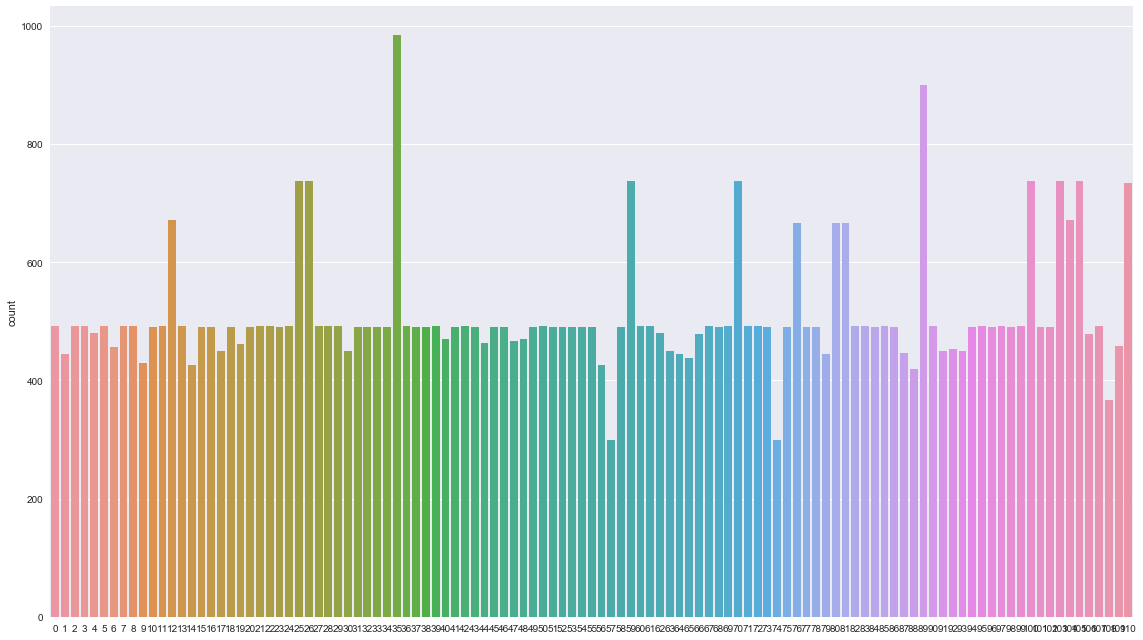

In [8]:
fig = plt.figure(figsize = (16,9))
sns.countplot(y_train)
plt.tight_layout()

In [9]:
x_test, y_test =  getFruits(fruits, 'Test')

There are  164   TEST  images of  APPLE BRAEBURN
There are  148   TEST  images of  APPLE CRIMSON SNOW
There are  164   TEST  images of  APPLE GOLDEN 1
There are  164   TEST  images of  APPLE GOLDEN 2
There are  161   TEST  images of  APPLE GOLDEN 3
There are  164   TEST  images of  APPLE GRANNY SMITH
There are  152   TEST  images of  APPLE PINK LADY
There are  164   TEST  images of  APPLE RED 1
There are  164   TEST  images of  APPLE RED 2
There are  144   TEST  images of  APPLE RED 3
There are  166   TEST  images of  APPLE RED DELICIOUS
There are  164   TEST  images of  APPLE RED YELLOW 1
There are  219   TEST  images of  APPLE RED YELLOW 2
There are  164   TEST  images of  APRICOT
There are  143   TEST  images of  AVOCADO
There are  166   TEST  images of  AVOCADO RIPE
There are  166   TEST  images of  BANANA
There are  152   TEST  images of  BANANA LADY FINGER
There are  166   TEST  images of  BANANA RED
There are  154   TEST  images of  BLUEBERRY
There are  166   TEST  images of  CA

#### Visualize Test Data

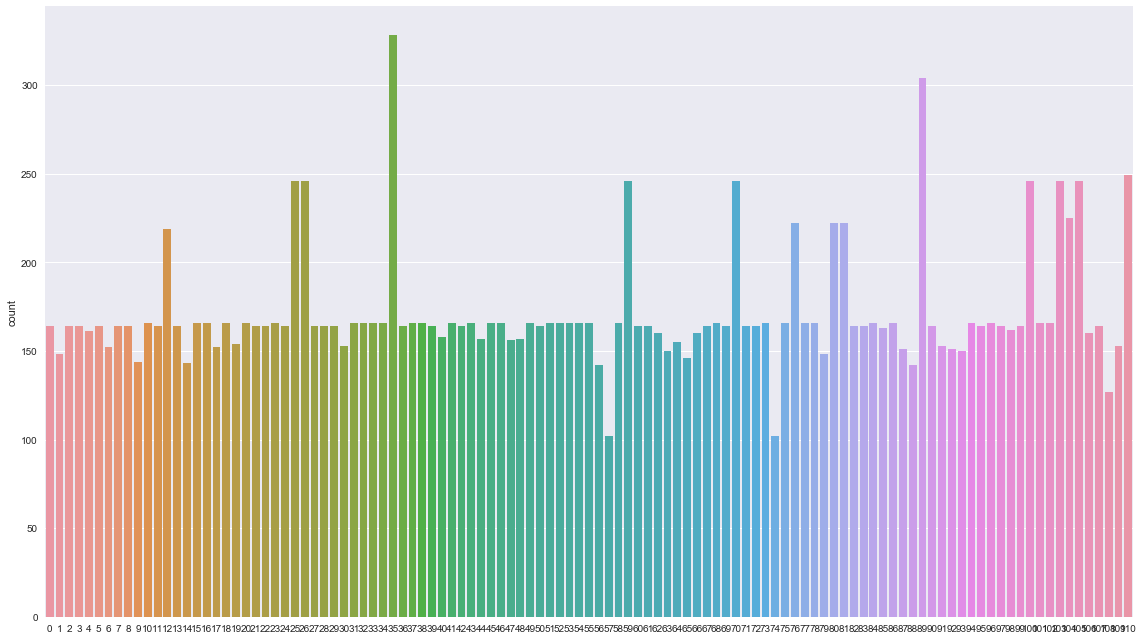

In [10]:
fig = plt.figure(figsize = (16,9))
sns.countplot(y_test)
plt.tight_layout()

In [11]:
gc.collect()

3115

## Check size and  shape of data

In [12]:
num_classes =len(np.unique(y_train))
print("There are {} classes". format(num_classes))

There are 111 classes


In [13]:
print ('Training Set size:', x_train.shape)
print('Test set size:', x_test.shape)

Training Set size: (56781, 64, 64, 3)
Test set size: (19053, 64, 64, 3)


In [14]:
print ('Number of Training set labels:', y_train.shape)
print('Number of Test set labels:', y_test.shape)

Number of Training set labels: (56781,)
Number of Test set labels: (19053,)


## Visualize the Images in Dataset
Visualization code taken from: https://www.kaggle.com/aninditapani/cnn-from-scratch-with-98-accuracy

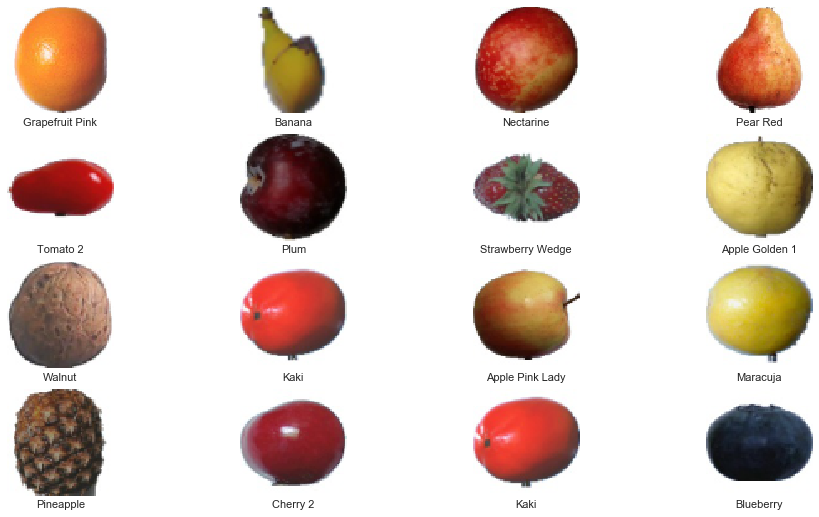

In [15]:
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    true_idx = y_test[idx]
    ax.set_xlabel("{}".format(fruits[true_idx]))

In [16]:
gc.collect()

32549

# Create the CNN Model

### VGG16 Pretrained Model
Methodology from: https://www.kaggle.com/shaileshsingh1/transfer-learning-vgg16-keras 

In [3]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


In [4]:
from keras.applications import VGG16

In [5]:
vgg = VGG16(input_shape = (64,64,3), weights = 'imagenet', include_top = False) 

W0714 16:50:48.202236 11420 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 16:50:48.485088 11420 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 16:50:48.539872 11420 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 16:50:48.624251 11420 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0714 16:50

In [6]:
for layer in vgg.layers:
    layer.trainable = False

In [7]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [8]:
x = Flatten()(vgg.output)

In [9]:
x = Dense(111, activation = 'softmax')(x)

In [10]:
model_vgg = Model(inputs = vgg.input, outputs = x)

In [11]:
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0714 16:50:51.282869 11420 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

#### Visualize the VGG16 Model

In [27]:
plot_model(model_vgg, show_shapes=True, to_file='vgg_block.png')

## Image Data Generator to Augment Images
### Create instances

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True) # augment and scale data

test_datagen= ImageDataGenerator(rescale=1./255) # rescaling  only 

### Create the image generators

In [4]:
train_set = train_datagen.flow_from_directory(
        'fruits-360/Training',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'fruits-360/Test',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical', 
        shuffle = False)

Found 56781 images belonging to 111 classes.
Found 19053 images belonging to 111 classes.


## Early Stopping/ Best VGG16 Model Conditions

In [52]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [53]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es=EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience = 10)
mc = ModelCheckpoint('Best_Fruit_CNN8_VGG16model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

#### Train the VGG16_Model 

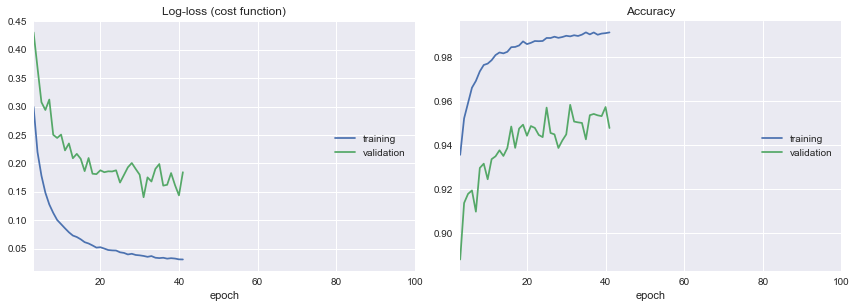

Log-loss (cost function):
training   (min:    0.031, max:    1.347, cur:    0.031)
validation (min:    0.140, max:    0.815, cur:    0.184)

Accuracy:
training   (min:    0.726, max:    0.991, cur:    0.991)
validation (min:    0.811, max:    0.958, cur:    0.948)

Epoch 00041: val_acc did not improve from 0.95827
Epoch 00041: early stopping


In [54]:
model_vgg.fit_generator(train_set,
        steps_per_epoch=1775,
        epochs=100,
        validation_data=test_set,
        verbose = 1, 
        callbacks= [es,plot_losses, mc],
        validation_steps=19053)

#### Load the Best VGG16 Model

In [1]:
from keras.models import load_model
saved_model = load_model('Best_Fruit_CNN8_VGG16model.h5')

Using TensorFlow backend.
W0713 11:47:17.610414 16300 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 11:47:18.263384 16300 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 11:47:18.557829 16300 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 11:47:20.323038 16300 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

#### Evaluate the VGG16_Model

In [7]:
train_loss, train_acc = saved_model.evaluate_generator(train_set, steps =1775, 
                                                       workers=0,use_multiprocessing= True, verbose =1)


1775/1775 [==============================] - 2153s 1s/step


In [10]:
test_loss, test_acc = saved_model.evaluate_generator(test_set, steps = 19053,verbose=1, workers=0,use_multiprocessing= True)
print('Train Accuracy: %.3f, Train Loss: %.3f' % (train_acc, train_loss))
print('Val Accuracy: %.3f, Val Loss: %.3f' % (test_acc, test_loss))

19053/19053 [==============================] - 837s 44ms/step
Train Accuracy: 0.991, Train Loss: 0.033
Val Accuracy: 0.958, Val Loss: 0.140


#### Make Predictions

In [11]:
ypred = saved_model.predict_generator(test_set, steps=19053)

#### Label Mapping

In [12]:
import numpy as np
import pandas as pd

In [13]:
pred_class_indices=np.argmax(ypred,axis=1)

In [16]:
len (pred_class_indices)

19053

In [14]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_class_indices]

#### Create a Dataframe of Prections

In [19]:
filenames=test_set.filenames
len(filenames)
results=pd.DataFrame({"Actual":filenames,
                    "Predictions":predictions})
results.to_csv("Fruit_Results_VGG16.csv",index=False)

In [20]:
df= pd.read_csv("Fruit_Results_VGG16.csv")

In [21]:
df.head()

,Actual,Predictions
0,Apple Braeburn\321_100.jpg,Apple Braeburn
1,Apple Braeburn\322_100.jpg,Apple Braeburn
2,Apple Braeburn\323_100.jpg,Apple Braeburn
3,Apple Braeburn\324_100.jpg,Apple Braeburn
4,Apple Braeburn\325_100.jpg,Apple Braeburn


In [23]:
df['Actual']=df['Actual'].apply(lambda x: x.split('\\')[0])

In [24]:
df.head()

,Actual,Predictions
0,Apple Braeburn,Apple Braeburn
1,Apple Braeburn,Apple Braeburn
2,Apple Braeburn,Apple Braeburn
3,Apple Braeburn,Apple Braeburn
4,Apple Braeburn,Apple Braeburn


In [25]:
df[(df['Actual'] != df['Predictions'])]

,Actual,Predictions
57,Apple Braeburn,Nectarine
58,Apple Braeburn,Nectarine
62,Apple Braeburn,Nectarine
63,Apple Braeburn,Nectarine
64,Apple Braeburn,Nectarine
66,Apple Braeburn,Nectarine
67,Apple Braeburn,Nectarine
68,Apple Braeburn,Nectarine
69,Apple Braeburn,Nectarine
71,Apple Braeburn,Nectarine


In [26]:
df['Correct/Incorrect']= df["Actual"] == df["Predictions"]

In [27]:
df.head()

,Actual,Predictions,Correct/Incorrect
0,Apple Braeburn,Apple Braeburn,True
1,Apple Braeburn,Apple Braeburn,True
2,Apple Braeburn,Apple Braeburn,True
3,Apple Braeburn,Apple Braeburn,True
4,Apple Braeburn,Apple Braeburn,True


# Visualize Results

### Load images

In [28]:
import glob
import os
import cv2

test_fruit_img = []
test_label = []
for dir_path in glob.glob("../*/fruits-360/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)
test_fruit_img = np.array(test_fruit_img)
test_label = np.array(test_label)
len(np.unique(test_label))

111

### Plot Images with Actual and Predicted Labels

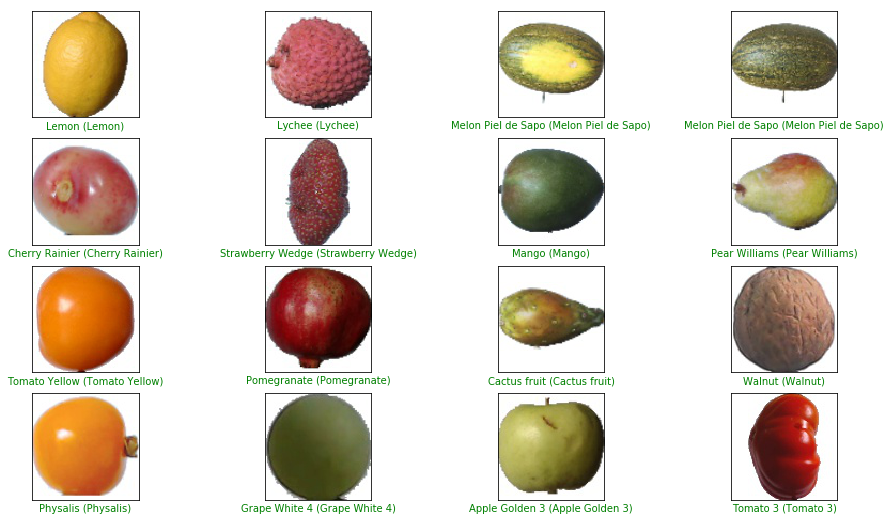

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
fig= plt.figure(figsize = (16, 9))
for i, idx in enumerate(np.random.choice(test_fruit_img.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_fruit_img[idx]))
    plt.xlabel("{} ({})". format(df['Predictions'][idx],df['Actual'][idx]),
               color=("green" if df['Correct/Incorrect'][idx] == True else "red"))

# Multiple Fruits Predictions

In [16]:
import glob
import os
import cv2
import numpy as np
import pandas as pd
import glob
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
multi_fruits_img = []
multi_labels = []
for img_path in glob.glob(os.path.join("../*/fruits-360/test-multiple_fruits", "*.jpg")):
     img_label = img_path.split("/")[-1]
     img = cv2.imread(img_path)
     img = cv2.resize(img, (64, 64))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     multi_fruits_img.append(img)
     multi_labels.append(img_label)
multi_fruits_img = np.array(multi_fruits_img)
multi_labels = np.array(multi_labels)
len(np.unique(multi_labels))

106

In [12]:
pred_multiple = saved_model.predict(multi_fruits_img, batch_size =1,verbose = 1)

106/106 [==============================] - 5s 51ms/step


In [13]:
pred_multiple_class_indices= np.argmax(pred_multiple, axis=1)

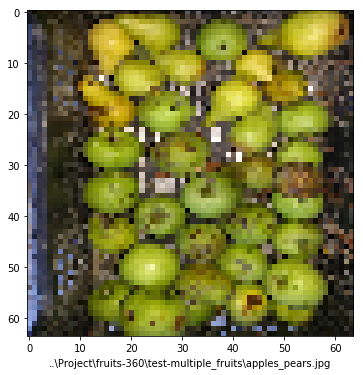

In [17]:
fig = plt.figure(figsize = (6, 6))
plt.imshow(multi_fruits_img[7])
plt.xlabel(multi_labels[7])

In [18]:
labels_multiple = (test_set.class_indices)
labels_multiple = dict((v,k) for k,v in labels_multiple.items())
multi_pred = [labels_multiple[k] for k in pred_multiple_class_indices]

In [19]:
results_multiple=pd.DataFrame({"Actual":multi_labels, "Predictions": multi_pred})
results_multiple.to_csv("Multiple_Fruits_Results_VGG16.csv",index=False)

In [20]:
df_multiple = pd.read_csv("Multiple_Fruits_Results_VGG16.csv")

In [21]:
df_multiple.head()

,Actual,Predictions
0,..\Project\fruits-360\test-multiple_fruits\app...,Pepper Red
1,..\Project\fruits-360\test-multiple_fruits\app...,Pepper Red
2,..\Project\fruits-360\test-multiple_fruits\app...,Pepper Green
3,..\Project\fruits-360\test-multiple_fruits\app...,Pepper Red
4,..\Project\fruits-360\test-multiple_fruits\app...,Pineapple Mini


In [22]:
df_multiple['Actual']=df_multiple['Actual'].apply(lambda x: x.split('\\')[4])

In [23]:
df_multiple['Actual']=df_multiple['Actual'].apply(lambda x: x.split('.')[0])

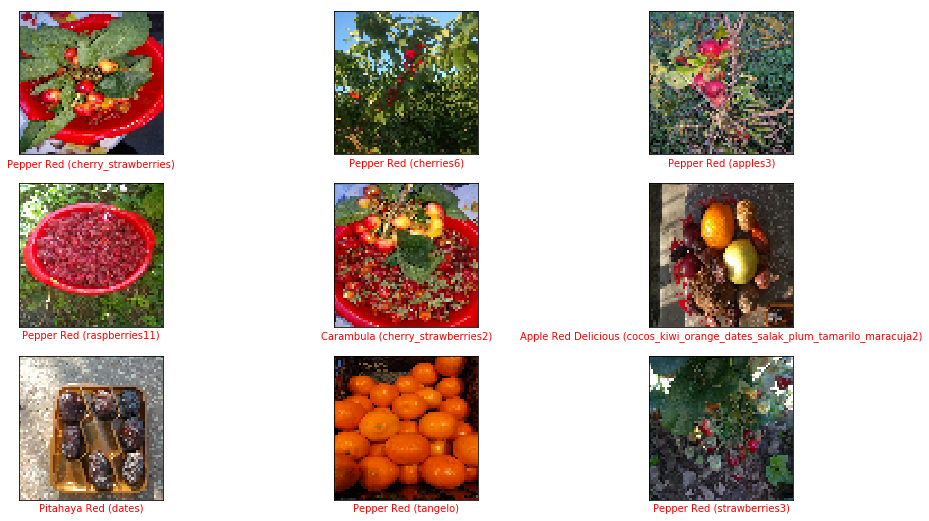

In [27]:
fig= plt.figure(figsize = (16, 9))
for i, idx in enumerate(np.random.choice(multi_fruits_img.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(multi_fruits_img[idx]))
    plt.xlabel("{} ({})". format(df_multiple['Predictions'][idx], df_multiple['Actual'][idx]),
               color=("green" if df_multiple['Actual'][idx] == df_multiple['Predictions'][idx] else "red"))